In [1067]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [1068]:
df = pd.read_csv('bengaluru_house_prices.csv')

print(df.columns)
df.head()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [1069]:
df.shape

(13320, 9)

In [1070]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [1071]:
df = df.drop(columns=['availability', 'society', 'balcony', 'area_type'])

In [1072]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data cleaning process involves handling the NaN values

In [1073]:
df.isnull().sum() # tells you the # of rows where a particular column is NaN

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [1074]:
df['bath'].fillna(df['bath'].mean(), inplace=True)

In [1075]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [1076]:
df.dropna(inplace=True)

In [1077]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [1078]:
df.shape

(13303, 5)

In [1079]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [1080]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [1081]:
df.drop(columns=['size'], inplace=True)

In [1082]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [1083]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [1084]:
df[df['bhk'] > 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [1085]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [1086]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [1087]:
import string
def average_split_sqft(area):
    if '-' in area:
        [left, right] = area.split(' - ')
        return (float(left) + float(right)) / 2
    elif is_float(area):
        return float(area)
    else:
        found_number = ''
        for each_letter in area:
            if each_letter not in string.ascii_letters:
                found_number += each_letter
            else:
                break
        if 'Perch' in area:
            area = float(found_number) * 272.3
        elif 'Sq. Meter' in area:
            area = float(found_number) * 10.7639
        elif 'Sq. Yards' in area:
            area = float(found_number) * 9
        elif 'Cents' in area:
            area = float(found_number) * 435.56
        area = found_number
        return float(area)

try:
    df['total_sqft'] = df['total_sqft'].apply(lambda x: average_split_sqft(x))
except Exception as e:
    print(e)

In [1088]:
df.shape

(13303, 5)

In [1089]:
df[df['bhk'] > 15]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000.0,27.0,230.0,27
3379,1Hanuman Nagar,2000.0,16.0,490.0,19
3609,Koramangala Industrial Layout,10000.0,16.0,550.0,16
4684,Munnekollal,2400.0,40.0,660.0,43
11559,1Kasavanhalli,1200.0,18.0,200.0,18


In [1090]:
df.loc[1718]

location      2Electronic City Phase II
total_sqft                       8000.0
bath                               27.0
price                             230.0
bhk                                  27
Name: 1718, dtype: object

In [1091]:
df['price_per_sqft'] = round(((df['price'] * 100000) / df['total_sqft']), 2)

df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [1092]:
len(df.location.unique())

1304

In [1093]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [1094]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [1095]:
len(location_stats[location_stats <= 10])

1052

In [1096]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [1097]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [1098]:
len(df['location'].unique())

1293

In [1099]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [1100]:
len(df['location'].unique())

242

In [1101]:
df.shape

(13303, 6)

In [1102]:
df = df[~(df['total_sqft'] / df['bhk'] < 300)]

In [1103]:
df.shape

(12521, 6)

In [1104]:
df['price_per_sqft'].describe()

count     12521.000000
mean       6307.232204
std        4159.844504
min         267.830000
25%        4211.470000
50%        5295.010000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [1105]:
def remove_outliers(dataframe):
    df_out = pd.DataFrame()
    for key, sub_dataframe in dataframe.groupby('location'):
        m = np.mean(sub_dataframe['price_per_sqft'])
        st = np.std(sub_dataframe['price_per_sqft'])
        reduced_df = sub_dataframe[(sub_dataframe['price_per_sqft'] > (m - st)) & (sub_dataframe['price_per_sqft'] <= (m + st))] # it is above the mean - std and below the mean + std
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

outlier_df = remove_outliers(df)
outlier_df.shape

(10293, 6)

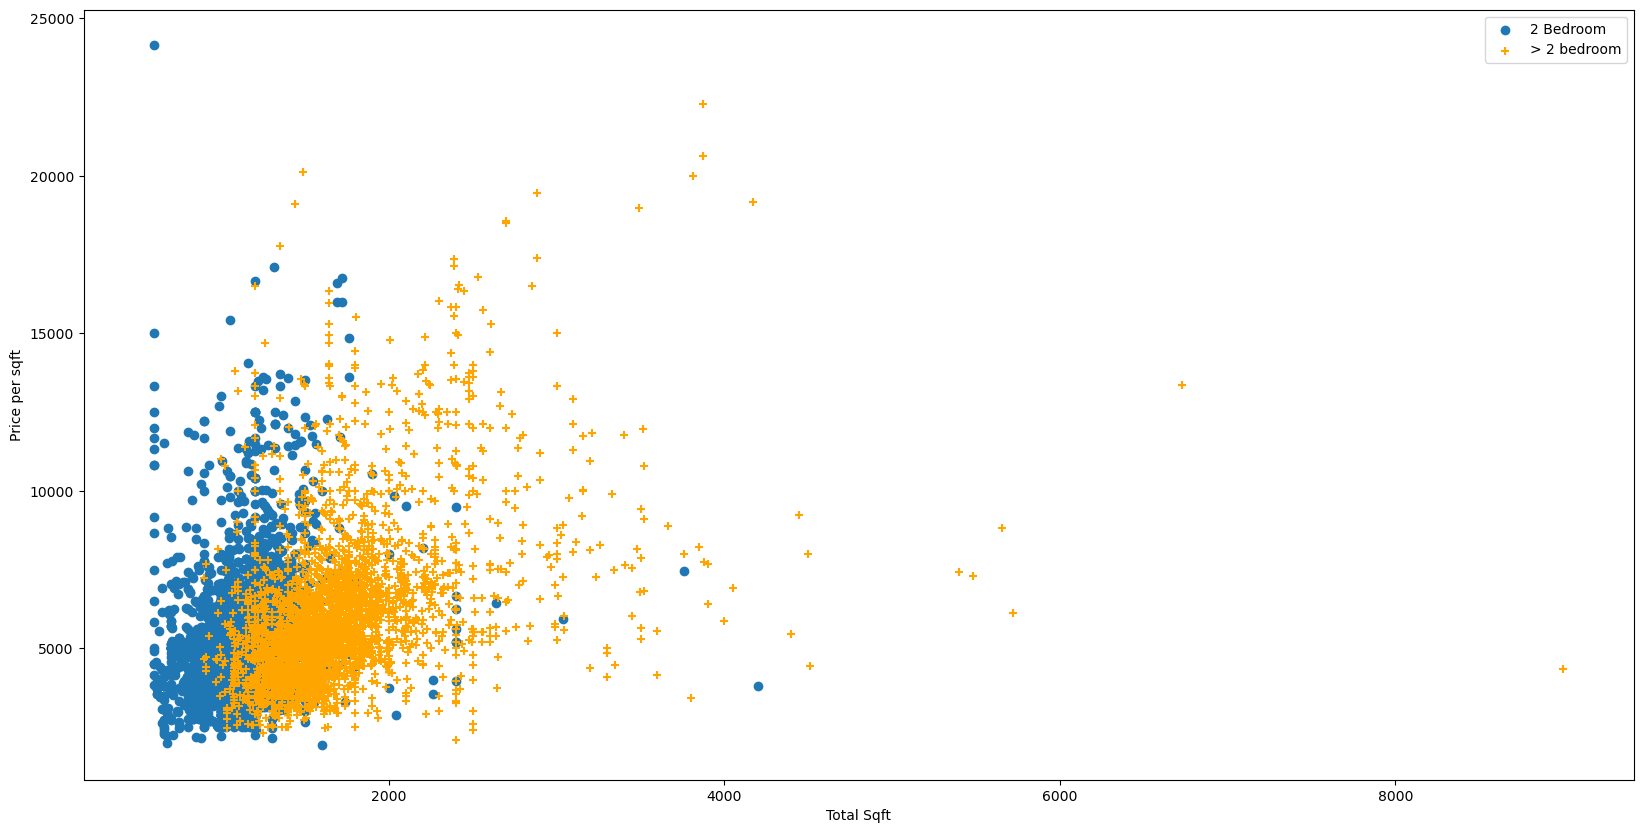

In [1106]:
two_bedroom_houses = outlier_df[outlier_df['bhk'] == 2]
more_two_bedroom_houses = outlier_df[outlier_df['bhk'] > 2]

plt.scatter(two_bedroom_houses['total_sqft'], two_bedroom_houses['price_per_sqft'], label='2 Bedroom')
plt.scatter(three_bedroom_houses['total_sqft'], three_bedroom_houses['price_per_sqft'], marker='+', color='orange', label='> 2 bedroom')
plt.xlabel("Total Sqft")
plt.ylabel("Price per sqft")
plt.legend()

In [1107]:
def remove_bhk_outliers(dataframe):
    exclude_indices = np.array([])
    for location, location_df in dataframe.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return dataframe.drop(exclude_indices, axis='index')

outlier_df = remove_bhk_outliers(outlier_df)

outlier_df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.81


In [1108]:
outlier_df.shape

(7353, 6)

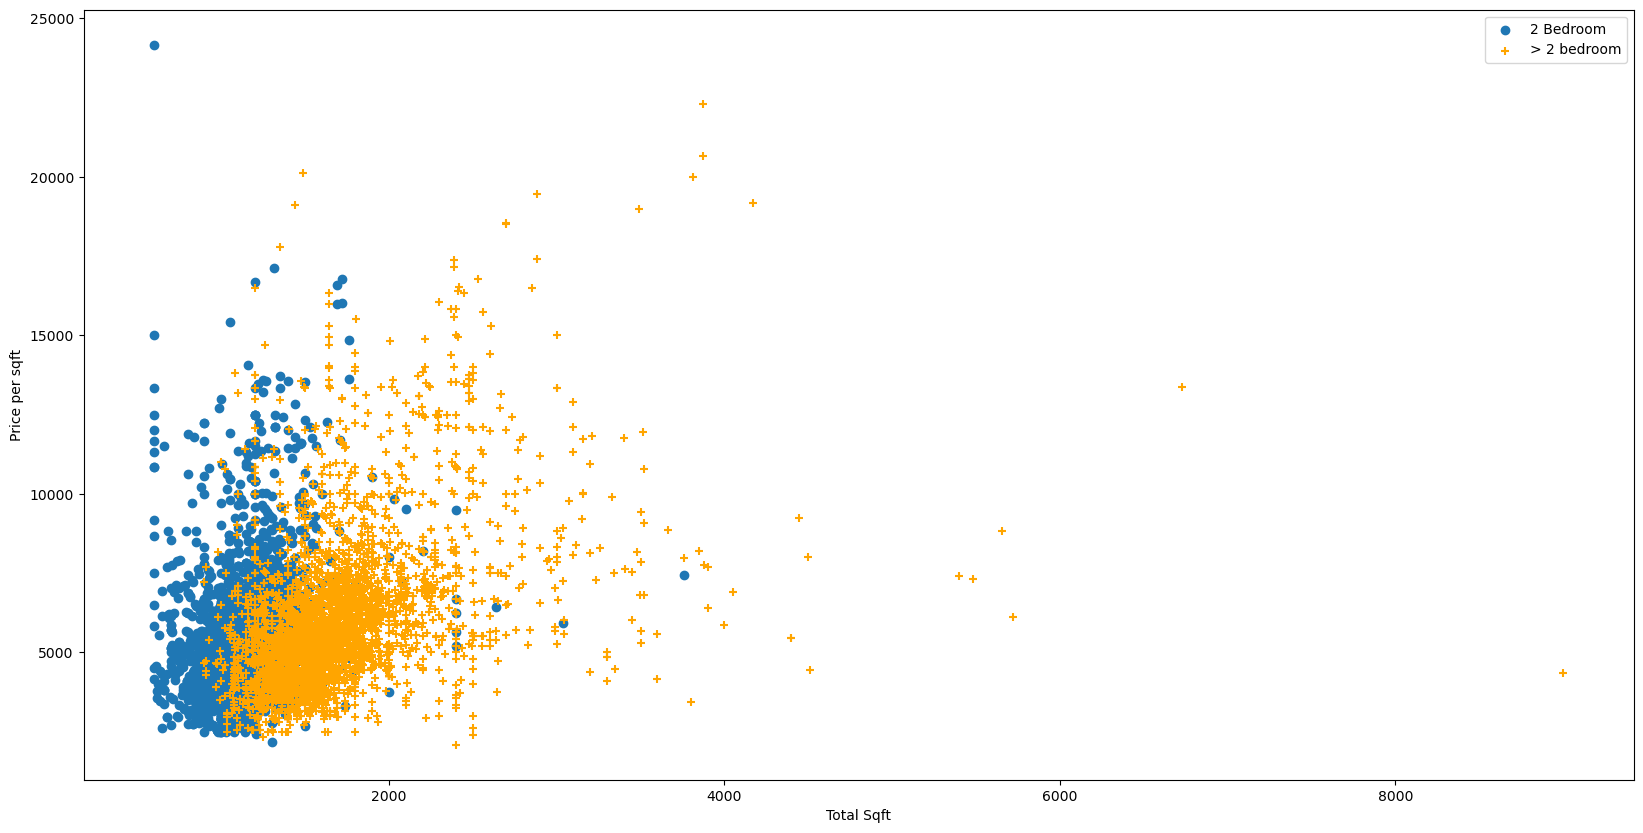

In [1109]:
two_bedroom_houses = outlier_df[outlier_df['bhk'] == 2]
more_two_bedroom_houses = outlier_df[outlier_df['bhk'] > 2]

plt.scatter(two_bedroom_houses['total_sqft'], two_bedroom_houses['price_per_sqft'], label='2 Bedroom')
plt.scatter(three_bedroom_houses['total_sqft'], three_bedroom_houses['price_per_sqft'], marker='+', color='orange', label='> 2 bedroom')
plt.xlabel("Total Sqft")
plt.ylabel("Price per sqft")
plt.legend()

Text(0, 0.5, 'Count')

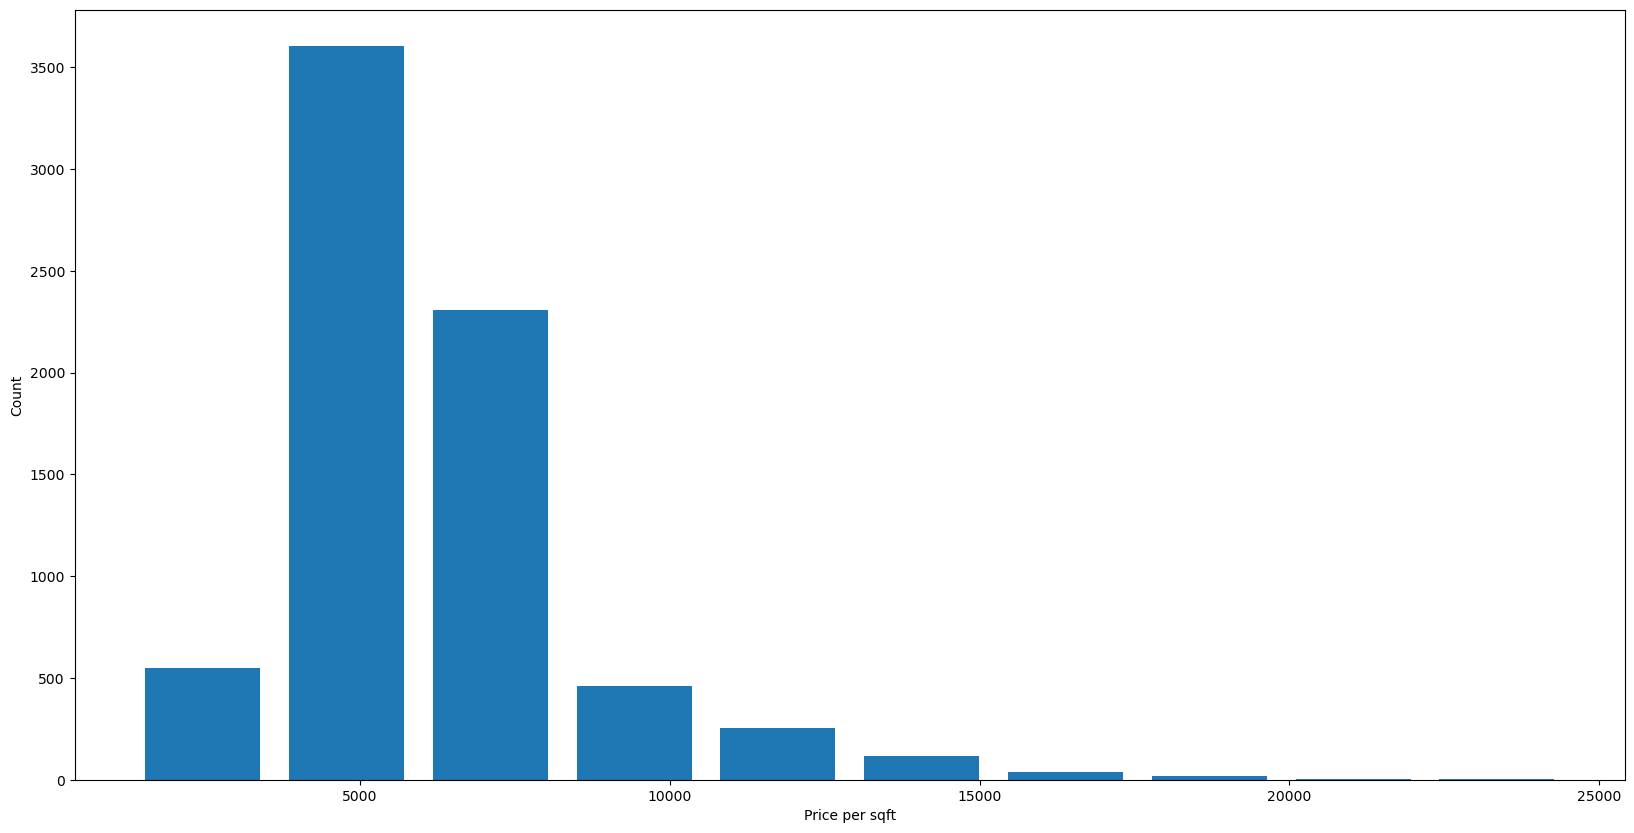

In [1110]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(outlier_df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [1111]:
outlier_df['bath'].unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  9.        ,  2.69260965,  7.        ,
       12.        , 16.        , 13.        ])

In [1112]:
outlier_df[outlier_df['bath'] > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5308,Neeladri Nagar,4000.0,12.0,160.0,10,4000.00
8536,other,12000.0,12.0,525.0,10,4375.00
8626,other,10000.0,16.0,550.0,16,5500.00
9359,other,6000.0,12.0,150.0,11,2500.00
9690,other,5425.0,13.0,275.0,13,5069.12


[Text(0.5, 0, '# of bathrooms'), Text(0, 0.5, 'Count')]

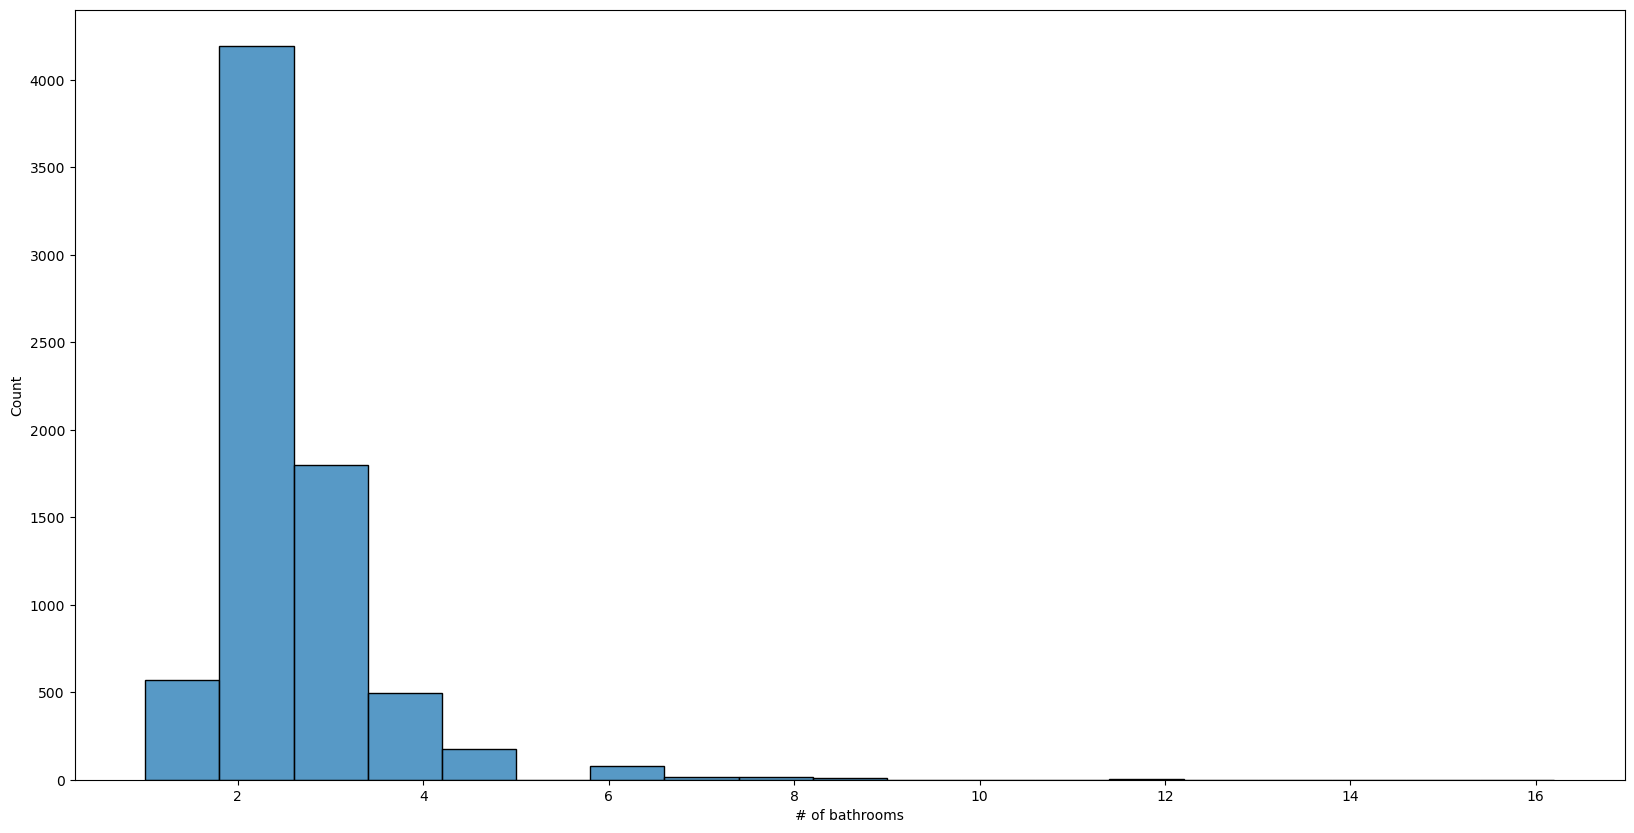

In [1113]:

ax = sn.histplot(outlier_df['bath'], binwidth=0.8)
ax.set(xlabel='# of bathrooms', ylabel='Count')


In [1114]:
outlier_df[outlier_df['bath'] > outlier_df['bhk'] + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1635,Chikkabanavar,2460.0,7.0,80.0,4,3252.03
5269,Nagasandra,7000.0,8.0,450.0,4,6428.57
6751,Thanisandra,1806.0,6.0,116.0,3,6423.03
8461,other,11338.0,9.0,1000.0,6,8819.90


In [1115]:
outlier_df = outlier_df[outlier_df['bath'] < outlier_df['bhk'] + 2]

outlier_df.shape

(7275, 6)

In [1116]:
training_dataframe = outlier_df.drop(columns=['price_per_sqft'])

training_dataframe.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [1117]:
training_dataframe.shape

(7275, 5)

In [1118]:
dummies = pd.get_dummies(training_dataframe['location'], drop_first=True)

dummies.shape

(7275, 241)

In [1119]:
training_dataframe = pd.concat([training_dataframe, dummies], axis='columns')

training_dataframe.drop(columns=['location'], inplace=True)

In [1120]:
training_dataframe.shape

(7275, 245)

In [1121]:
training_dataframe.head(3)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1122]:
x = training_dataframe.drop(columns=['price'])

In [1123]:
x.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1124]:
y = training_dataframe['price']

In [1125]:
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [1126]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=10)

In [1132]:
from sklearn.linear_model import LinearRegression

house_linear_model = LinearRegression()
house_linear_model.fit(train_x, train_y)

LinearRegression()

In [1128]:
house_linear_model.score(test_x, test_y)

0.8605939401501371

In [1129]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.8399988 , 0.87392563, 0.81102605, 0.81964594, 0.85252414])

In [1130]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

grid_search_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {}
    }
}

scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in grid_search_params.items():
    print('with algo = ', algo_name)
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(x, y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

new_dataframe = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

new_dataframe.head()

with algo =  linear_regression


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

with algo =  lasso
with algo =  decision_tree


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\flyin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\flyin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\flyin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\flyin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

with algo =  random_forest


,model,best_score,best_params
0,linear_regression,0.839424,{'normalize': False}
1,lasso,0.706155,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.724770,"{'criterion': 'mse', 'splitter': 'random'}"
3,random_forest,0.787231,{}


In [1136]:
def predict_home_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    new_x = np.zeros(len(x.columns))
    new_x[0] = sqft
    new_x[1] = bath
    new_x[2] = bhk
    if loc_index >= 0:
        new_x[loc_index] = 1
    return house_linear_model.predict([new_x])[0]

In [1138]:

predict_home_price('1st Phase JP Nagar', 1000, 2, 2)


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.18216778854875

In [1142]:

predict_home_price('1st Phase JP Nagar', 1000, 2, 3)


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.25669132336301

In [1140]:

predict_home_price('Indira Nagar', 1000, 2, 2)


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.08467883343604

In [1141]:
predict_home_price('Indira Nagar', 1000, 3, 3)

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


183.88686552326027

In [1143]:
import pickle
with open('home_prices_model.pickle', 'wb') as f:
    pickle.dump(house_linear_model, f)

In [1150]:
import json

columns = {
    'data_columns': [col.lower() for col in x.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))